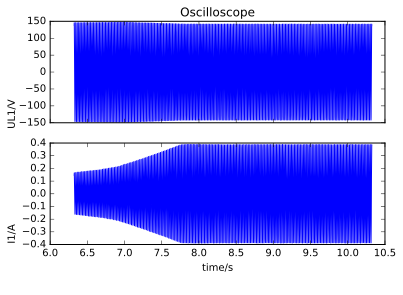

In [3]:
# 方法一：自己写for循环换算
# 问题：麻烦
"""
Created on Mon Nov  6 12:20:33 2017
1、把文件另存为csv文件
2、读取文件数据
3、改变时间格式（从字符串改为float型）
4、根据数据画出波形
@author: 完颜幸幸
"""
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# 读取数据
file_directory = "示波器20141732上线阈值11.csv"
data = pd.read_csv(file_directory,sep = '\t')
#data.columns #查看表格有哪些列
time1 = data.时间

time = list(range(len(time1)))
for i in range(len(time1)):#把秒和毫秒的内容从字符串转化为float并保存在列表tm中
    time[i] = float(time1[i][6:])
    
# 画图
f,(ax1,ax2) = plt.subplots(2,1,sharex=True,sharey=False)
                                    #共享X轴，共享y轴  
ax1.plot(time,data.UL1) 
ax2.plot(time,data.I1)
ax1.set_title('Oscilloscope')
plt.xlabel('time/s')
plt.ylabel('              I1/A                              UL1/V')

%config InlineBackend.figure_format = 'svg'
# 上面一行指定了输出的格式是 svg，这样浏览器就能为你渲染矢量图了。
# savefig 只要指定文件名后缀是 .pdf 或者 .eps 就能生成能方便地插入 latex 的图片了！
plt.savefig('PQ.pdf', bbox_inches='tight')


方法一：自己写for循环换算
问题：麻烦

方法二：pd.read_csv(parse_dates=['时间'])
自动在‘时间’列表中加入运行程序的日期？不明白为啥？

方法三:parse_dates=True
错误;could not convert string to float: '17:32:10.322775'
添加这句转换语句time =pd.to_datetime(data.时间)
可以画图，但问题同方法二。
原因：是不是没有指定format的原因？

方法四：pd.read_csv(parse_dates=[['日期','时间']])
错误:could not convert string to float: '2017/14/10 17:32:10.322775'
添加这句解析语句:time =pd.to_datetime(data.日期_时间,format='%Y/%d/%m %H:%M:%S.%f')
成功运行，没有问题！

In [1]:
"""
Created on Mon Nov  6 12:20:33 2017
1、把文件另存为csv文件
2、读取文件数据(pd.read_csv)
3、改变时间格式（pd.to_datetime:从字符串改为float型）
4、根据数据画出波形
@author: 完颜幸幸
"""
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# 读取数据
file_directory = "示波器20141732上线阈值11.csv"
data = pd.read_csv(file_directory,sep='\t',parse_dates=[['日期','时间']])
# 读取原始数据，把日期和时间两列合并为一列
#data.columns #查看表格有哪些列

# 根据数据的时间格式解析时间
# （2017/14/10 17:32:06.329269）即format='%Y/%d/%m %H:%M:%S.%f'
time =pd.to_datetime(data.日期_时间,format='%Y/%d/%m %H:%M:%S.%f')

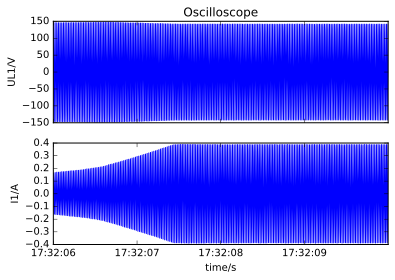

In [2]:
# 复现数据，画图
f,(ax1,ax2) = plt.subplots(2,1,sharex=True,sharey=False)
                                  #共享X轴，共享y轴  
ax1.plot(time,data.UL1) 
ax2.plot(time,data.I1)
ax1.set_title('Oscilloscope')
plt.xlabel('time/s')
ax1.set_ylabel('UL1/V')
ax2.set_ylabel('I1/A')
%config InlineBackend.figure_format = 'svg'
# 上面一行指定了输出的格式是 svg，这样浏览器就能为你渲染矢量图了。
# savefig 只要指定文件名后缀是 .pdf 或者 .eps 就能生成能方便地插入 latex 的图片了！
plt.savefig('PQ', bbox_inches='tight')

In [57]:
data[1:10]

,日期_时间,UL1,UNE,I1,IN
1,2017/14/10 17:32:06.322824,138.436,0.220,0.147,0.0
2,2017/14/10 17:32:06.322849,139.248,0.226,0.147,0.0
3,2017/14/10 17:32:06.322873,139.198,0.218,0.148,0.0
4,2017/14/10 17:32:06.322897,139.304,0.236,0.148,0.0
5,2017/14/10 17:32:06.322922,139.134,0.217,0.149,0.0
6,2017/14/10 17:32:06.322946,139.356,0.211,0.149,0.0
7,2017/14/10 17:32:06.322971,139.388,0.218,0.149,0.0
8,2017/14/10 17:32:06.322995,140.921,0.207,0.150,0.0
9,2017/14/10 17:32:06.323019,140.590,0.197,0.152,0.0
